In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [ ]:

Us = np.linspace(1,15, 15)

sc_dic = {'U':[], 'mu':[], 'nu':[], 'sq_det_SFW':[], 'SFWxx':[], 'SFWxy':[], 'delta':[], 'ns':[], 'deltaError':[], 'nError':[]}

for Uv in Us:
    ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5], nu=3, U=[Uv,Uv], mu=[-1,-1])
    dels, nus, mus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=10, Nmax=1200)
    
    print('sc ', Uv)
    nu_test = np.sum(ham.striped_props()[2])

    sfws, sdsfw = ham.detSFW(80)

    sc_dic['sq_det_SFW'].append(sdsfw)
    sc_dic['SFWxx'].append(sfws[0])
    sc_dic['SFWxy'].append(sfws[1])

    sc_dic['U'].append(Uv)
    sc_dic['mu'].append(ham.mu[0])
    sc_dic['nu'].append(nu_test)
    sc_dic['delta'].append([dels[0,-1],dels[1,-1]])
    sc_dic['ns'].append([nus[0,-1],nus[1,-1]])
    sc_dic['deltaError'].append(np.sum(np.std(np.abs(dels[:,-3:]), axis=1)))
    sc_dic['nError'].append(np.sum(np.std(np.abs(nus[:,-3:]), axis=1)))
    
    print('U, nu, sfw', Uv, nu_test, sfws)

sc_df = pd.DataFrame.from_dict(sc_dic)




SyntaxError: invalid syntax (2776082332.py, line 5)

In [ ]:

Us = np.linspace(0.00001,10, 15)
mus = [-3, -2.5, -2, -1.5, -1, 0.5, 1]


sc_dic = {'U':[], 'mu':[], 'nu':[], 'sq_det_SFW':[], 'SFWxx':[], 'SFWxy':[], 'delta':[], 'ns':[], 'deltaError':[], 'nError':[]}
for m in mus:
    for Uv in Us:
        ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5], nu=0, U=[Uv,Uv], mu=[m,m])
        dels, nus, mus = ham.Deltra(40,HF=True, alpha=0.7, Nmin=10, Nmax=1200)
        
        print('sc ', Uv)
        nu_test = np.sum(ham.striped_props()[2])

        sfws, sdsfw = ham.detSFW(80)

        sc_dic['sq_det_SFW'].append(sdsfw)
        sc_dic['SFWxx'].append(sfws[0])
        sc_dic['SFWxy'].append(sfws[1])

        sc_dic['U'].append(Uv)
        sc_dic['mu'].append(ham.mu[0])
        sc_dic['nu'].append(nu_test)
        sc_dic['delta'].append([dels[0,-1],dels[1,-1]])
        sc_dic['ns'].append([nus[0,-1],nus[1,-1]])
        sc_dic['deltaError'].append(np.sum(np.std(np.abs(dels[:,-3:]), axis=1)))
        sc_dic['nError'].append(np.sum(np.std(np.abs(nus[:,-3:]), axis=1)))
        
        print('U, nu, sfw', Uv, nu_test, sfws)

    
sc_df = pd.DataFrame.from_dict(sc_dic)

sc  1e-05
U, nu, sfw 1e-05 (0.00028737184710839403+2.689174842611024e-43j) [[-1.47038378e-18+1.07653464e-35j -9.40305660e-28-8.40198941e-45j]
 [-9.40305663e-28-8.40198730e-45j -1.47038377e-18+1.07653462e-35j]]
sc  0.714295
U, nu, sfw 0.714295 (4.707341846962518e-05+1.1432528159932538e-26j) [[-1.55001490e-08+1.17225485e-25j -3.01123155e-24-1.14183398e-39j]
 [-2.97736883e-24-1.07468483e-39j -1.55001490e-08+1.17225485e-25j]]
sc  1.4285800000000002
U, nu, sfw 1.4285800000000002 (7.0780666191044775e-06-3.759961370145819e-28j) [[-1.18279528e-07+9.06824066e-25j -4.70817847e-23+6.29604656e-39j]
 [-4.72761720e-23+6.06573587e-39j -1.18279528e-07+9.06824066e-25j]]
sc  2.142865
U, nu, sfw 2.142865 (9.343363243402498e-06-4.200047076101412e-28j) [[-1.08765176e-06+8.35758905e-24j -6.10555601e-22-3.32494360e-38j]
 [-6.12681453e-22-3.25206711e-38j -1.08765176e-06+8.35758905e-24j]]
sc  2.8571500000000003
U, nu, sfw 2.8571500000000003 (0.0001717784501848072-6.880922795931498e-35j) [[-4.12091093e-05+3.159

In [11]:
sc_dic['SFWxx_new']=np.array(sc_dic['SFWxx'])[:,0]
sc_dic['SFWxy_new']=np.array(sc_dic['SFWxx'])[:,1]

In [12]:
sc_dic

{'U': [1e-05,
  0.714295,
  1.4285800000000002,
  2.142865,
  2.8571500000000003,
  3.5714350000000006,
  4.2857199999999995,
  5.000005,
  5.71429,
  6.428575,
  7.142860000000001,
  7.857145,
  8.57143,
  9.285715,
  10.0],
 'mu': [-0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5,
  -0.5],
 'nu': [(1.9449147463494572-7.146984320078995e-26j),
  (1.9850047595824227+9.337253360465391e-23j),
  (4.01998839369254+1.0016223751031828e-24j),
  (4.105240769248848-3.922304666532686e-27j),
  (4.572855811726734-1.4496946825089358e-23j),
  (5.9054485283776454+6.3790424183603785e-22j),
  (5.999991172676388+6.456230663371364e-26j),
  (5.999995483879329-2.1342388426970628e-23j),
  (5.999995661451669-2.6137630416330584e-29j),
  (5.999996241748209+6.195718283338425e-29j),
  (5.999996353046047-7.376478550425396e-29j),
  (5.999995661299929-2.7927733232329575e-28j),
  (5.999995598951627+1.036842175088635e-22j),
  (5.999995195853559+7.529028308533

In [13]:
SFWdf = pd.DataFrame.from_dict(sc_dic)

In [14]:
SFWdf

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.000010,-0.5,1.944915-0.000000j,2.897265e-14-2.050631e- 31j,[(-2.897241534119759e-14+2.028099509591459e-31...,[(4.265674942373409e-20-1.1263598389405047e-34...,[(0.00019159506140393128+1.7339508840880406e-3...,"[(0.9724101659797186-7.146984319310263e-26j), ...",0.000164,3.978894e-05,-2.897242e-14+2.028100e- 31j,4.265675e-20-1.126360e- 34j
1,0.714295,-0.5,1.985005+0.000000j,1.151739e-05+2.960530e- 25j,[(-1.1517388255495108e-05-2.9604637329791473e-...,[(1.207462272133048e-19+2.7741346582820492e-31...,[(0.00023816682119810886+7.524925394861562e-32...,"[(1.0582540283943032+9.337252831522612e-23j), ...",0.000116,1.617936e-06,-1.151739e-05-2.960464e- 25j,1.215591e-19+2.774135e- 31j
2,1.428580,-0.5,4.019988+0.000000j,1.425212e-03-4.666048e- 21j,[(-0.0014252117466762241+4.666047728043902e-21...,"[(5.896502605186623e-18-7.8875645712787e-34j),...",[(0.001283629016680793+1.8759623333383851e-34j...,"[(0.8560993045631178+1.001622374204646e-24j), ...",0.000170,1.178433e-06,-1.425212e-03+4.666048e- 21j,5.872646e-18-7.883092e- 34j
3,2.142865,-0.5,4.105241-0.000000j,9.357831e-02+4.759874e- 19j,"[(-0.0935783062871118-4.759873815113984e-19j),...",[(-9.249900232559052e-18+9.081228195753017e-34...,[(0.054795326525442944-3.4781805209976294e-31j...,"[(0.8337768894975446-3.922307920573214e-27j), ...",0.000164,2.275200e-05,-9.357831e-02-4.759874e- 19j,-8.687293e-18+9.090170e- 34j
4,2.857150,-0.5,4.572856-0.000000j,1.914012e-01-1.088206e- 18j,[(-0.19140120762075097+1.088205706922718e-18j)...,[(-2.9700787109870658e-18-1.8476594179478713e-...,[(0.26967957175732266-1.7327064998367054e-23j)...,"[(1.1209272760648936-1.449694682482321e-23j), ...",0.000040,9.847374e-05,-1.914012e-01+1.088206e- 18j,-2.490584e-18-1.971838e- 33j
5,3.571435,-0.5,5.905449+0.000000j,2.341882e-02-9.428384e- 21j,[(-0.023418821013789157+9.428383629734296e-21j...,[(5.562258983056158e-19+3.297473830132426e-33j...,[(0.12413748763963839-2.6176705289952976e-22j)...,"[(1.9458870747176547+6.379042418327156e-22j), ...",0.000148,1.166522e-04,-2.341882e-02+9.428384e- 21j,7.056425e-19+3.300275e- 33j
6,4.285720,-0.5,5.999991+0.000000j,8.578729e-07-2.476359e- 24j,[(-8.578729167479569e-07+2.4763587204635514e-2...,[(6.433164302002273e-22+8.17879754134922e-39j)...,[(0.0014082985720572285-3.69627021632132e-27j)...,"[(1.9999945887912942+6.45623177094187e-26j), (...",0.000147,1.069604e-06,-8.578729e-07+2.476359e- 24j,6.418792e-22+8.243394e- 39j
7,5.000005,-0.5,5.999995-0.000000j,2.529925e-07-8.429571e- 25j,[(-2.529924795843623e-07+8.429570637911534e-25...,[(-1.140007523003434e-22+1.1089952277302073e-3...,[(0.0009853590507900984+2.446215295865399e-26j...,"[(1.9999972767141427-2.1342388538656192e-23j),...",0.000147,7.837022e-07,-2.529925e-07+8.429571e- 25j,-1.140682e-22+1.130921e- 38j
8,5.714290,-0.5,5.999996-0.000000j,1.662135e-07-5.604430e- 25j,[(-1.662134706409496e-07+5.604430466027104e-25...,[(1.4967017520903699e-22+1.802223317750303e-38...,[(0.0009056385210470092+3.501097837022415e-35j...,"[(1.9999975640233063-2.614259041350783e-29j), ...",0.000162,8.575863e-07,-1.662135e-07+5.604430e- 25j,1.496942e-22+1.797443e- 38j
9,6.428575,-0.5,5.999996+0.000000j,1.068746e-07-3.578098e- 25j,[(-1.0687461621961531e-07+3.5780977956946876e-...,[(9.651708486389859e-23-3.6675422400408846e-39...,[(0.0007875902711136191+1.5192004080257032e-35...,"[(1.9999980484050237+6.195764558150437e-29j), ...",0.000157,7.897818e-07,-1.068746e-07+3.578098e- 25j,9.646335e-23-3.716473e- 39j


In [15]:
SFWdf.to_csv('sfw_scn_15U_0-10_mu_eq_-0c5')

In [126]:
n=3
d = SFWdf.delta.iloc[n]
ns = SFWdf.ns.iloc[n]
Uv = SFWdf.U.iloc[n]
m = SFWdf.mu.iloc[n]
nu = SFWdf.nu.iloc[n]


In [31]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])


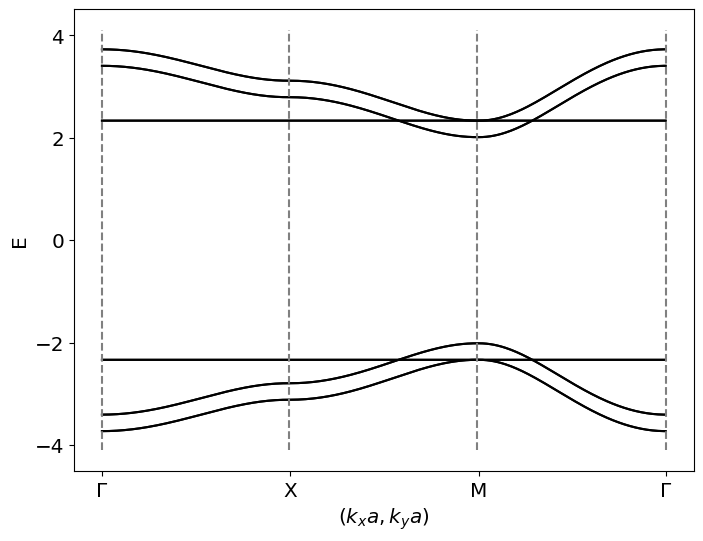

In [32]:
ham.plot_bands()

In [86]:
sfwtab_1 = pd.read_csv(r'sfw_scmu_10U_0-3_nu_eq_3', index_col=0)
sfwtab_1

,U,mu,nu,sq_det_SFW,SFWxx,SFWxy,delta,ns,deltaError,nError,SFWxx_new,SFWxy_new
0,0.001000,(-0.0004998413717437144-1.7883152986734597e-24j),(2.998250462479551-1.2770783474693569e-20j),(2.0869959256948913+5.0612203823638e-19j),[-2.08699594e+00-1.08034290e-18j 2.46342089e-...,[ 2.46342089e-04-1.37995872e-19j -2.08699594e+...,[(0.00014852142469814212+4.245898188581434e-21...,"[(1.0024913268986988-1.3582572839341786e-26j),...",5.789839e-06,0.000093,(-2.0869959402335976-1.080342899881003e-18j),(0.0002463420890672682-1.3799587175375357e-19j)
1,0.334222,(-0.1670536281258514+5.342896739276391e-21j),(2.998082472032473-2.4338357651418266e-19j),(0.20729625221987066+1.1996873502222309e-18j),[-0.21586395-1.44750492e-18j 0.06021219+8.309...,[ 0.06021219+8.30944876e-19j -0.21586395-1.320...,[(0.016209520399599345+1.6523066034928748e-19j...,"[(1.0001523962344394+3.9336683499313177e-22j),...",2.249872e-07,0.000109,(-0.21586394789646124-1.4475049179507481e-18j),(0.06021218993725808+8.309448761303099e-19j)
2,0.667444,(-0.33359952201047194+3.659494579639856e-21j),(2.997935720144892-1.3204024571697615e-19j),(0.27905440740894905+1.801224937368322e-19j),[-0.2943999 -1.44561331e-18j 0.09380799+7.993...,[ 0.09380799+7.99385342e-19j -0.2943999 +5.947...,"[(0.03362825606166449+9.120886015456396e-21j),...","[(1.0002550762878484-6.212278821501623e-21j), ...",1.247976e-07,0.000117,(-0.294399899355937-1.4456133143962643e-18j),(0.0938079871142421+7.993853420272534e-19j)
3,1.000667,(-0.500141372102053+1.1384925767701415e-20j),(2.9978279889286314-1.0616086033107087e-19j),(0.34872161136101437+1.0422249793258574e-18j),[-0.36670703+1.49112532e-19j 0.11343404+1.056...,[ 0.11343404+1.05626294e-18j -0.36670703-2.784...,[(0.053750531341223685-6.550616443576443e-20j)...,"[(1.0004105992614192-1.0725262946414952e-20j),...",5.808863e-07,0.000123,(-0.36670702804013205+1.4911253234749336e-19j),(0.11343404331954067+1.0562629431939354e-18j)
4,1.333889,(-0.666666205271484-4.4091591986218895e-21j),(2.997618664571199+5.675195694735282e-20j),(0.4107128088683177+1.757067651423552e-19j),[-0.4290532 -1.08146169e-18j 0.12410334+9.350...,[ 0.12410334+9.35065232e-19j -0.4290532 +2.041...,"[(0.07678573788529808-4.796497335242036e-21j),...","[(1.0006400306972558+4.846239492376816e-20j), ...",2.433881e-06,0.000133,(-0.42905320243487327-1.0814616898616877e-18j),(0.12410334061221759+9.350652317139577e-19j)
5,1.667111,(-0.8331593075491678-1.882871986632883e-20j),(2.9972655570874336+1.2953854106852917e-19j),(0.4655047288339459+1.503997766519397e-18j),[-0.48276494-1.70210799e-18j 0.12793487+9.767...,[ 0.12793487+9.76743854e-19j -0.48276494-1.716...,[(0.10284540264713424-6.3604915109840756e-21j)...,"[(1.000988528110796+2.2528567199640843e-20j), ...",8.443498e-06,0.000148,(-0.48276493561359135-1.7021079915447424e-18j),(0.12793486816041433+9.767438540961293e-19j)
6,2.000333,(-0.9996284552438277+1.9416044911919895e-20j),(2.996883396865896-9.347423760292702e-20j),(0.5127186424551564+1.6321654505186689e-18j),[-0.52801141-3.33498863e-18j 0.12615723+8.242...,[ 0.12615723+8.24281364e-19j -0.52801141-2.286...,"[(0.1317579054981698+4.451549361640573e-22j), ...","[(1.0014576068517942+1.706795958707076e-20j), ...",2.638842e-05,0.000163,(-0.5280114132007423-3.3349886331092585e-18j),(0.12615722789118275+8.242813639430251e-19j)
7,2.333556,(-1.1660934440671564-8.080506315936667e-21j),(2.9965843169901385+4.7864211467860814e-20j),(0.5512892893850049+2.983736889716054e-18j),[-0.56416793-3.77884695e-18j 0.11985648+8.921...,[ 0.11985648+8.92129551e-19j -0.56416793-2.431...,"[(0.1629409529138118-1.2675264339311441e-19j),...","[(1.0020048605541056+6.932566768009252e-22j), ...",7.642690e-05,0.000170,(-0.5641679330739313-3.77884695212444e-18j),(0.11985648133613394+8.921295509385545e-19j)
8,2.666778,(-1.3326341869699307+3.4002121119301665e-20j),(2.996691448888708-1.7021703115694834e-19j),(0.5800250873584806+2.8228993683400964e-18j),[-0.59041638-2.56512686e-18j 0.11028325+1.452...,[ 0.11028325+1.45246141e-19j -0.59041638

In [97]:
n=3
d =sfwtab_1.delta.iloc[n]
ns =sfwtab_1.ns.iloc[n]
mu = sfwtab_1.mu.iloc[n]
nu =sfwtab_1.nu.iloc[n]
Uv = sfwtab_1.U.iloc[n]


In [98]:
m= complex(mu)
nu = complex(nu)

In [99]:
ns=list(literal_eval(ns[1:-1]))
d=list(literal_eval(d[1:-1]))

In [100]:
d

[(0.053750531341223685-6.550616443576443e-20j),
 (0.27687465705030206+3.4400784572571072e-18j)]

In [106]:
ham = hamiltonian.Model(N=2, kind='dDSL', delta=d, ns=ns,nu=nu, U=[Uv,Uv], mu=[m,m])
ham = hamiltonian.Model(N=2, kind='dDSL', delta=[1,1], ns=[0.5,0.5],nu=3, U=[1,1], mu=[0.1,0.1])


In [107]:
nu

(2.9978279889286314-1.0616086033107087e-19j)

In [108]:
ham.Deltra(50,HF=True, alpha=0.7, Nmin=10, Nmax=1300)

(array([[1.        +0.00000000e+00j, 0.77472966-5.33944281e-20j,
         0.6048314 +3.56750231e-20j, 0.47611711-1.72665808e-19j,
         0.37810968-8.22258596e-20j, 0.30316893-7.81050759e-20j,
         0.24568614-4.90302465e-20j, 0.20149673+5.43479893e-20j,
         0.16747553+5.63404398e-20j, 0.14125731+7.48380872e-20j,
         0.12104056+3.97584402e-20j, 0.10544668+3.07535881e-20j,
         0.09341724+1.48869765e-20j, 0.08413774+2.36095166e-20j,
         0.07698039+8.41565823e-21j, 0.0714609 -4.31002782e-20j,
         0.06720541+1.27862769e-20j, 0.06392526-3.81226487e-20j,
         0.06139756-5.79334353e-20j, 0.0594502 -9.63404371e-20j,
         0.05795031-3.96864266e-20j, 0.05679536-5.36964375e-20j,
         0.05590622-1.69696972e-20j, 0.05522187-5.10867068e-20j,
         0.05469525-4.11175291e-20j, 0.05429008-3.00205716e-20j,
         0.05397841-8.32156953e-21j, 0.0537387 -2.31905100e-20j,
         0.05355437-3.10539402e-20j, 0.05341264-2.86373394e-20j,
         0.05330369-5.209

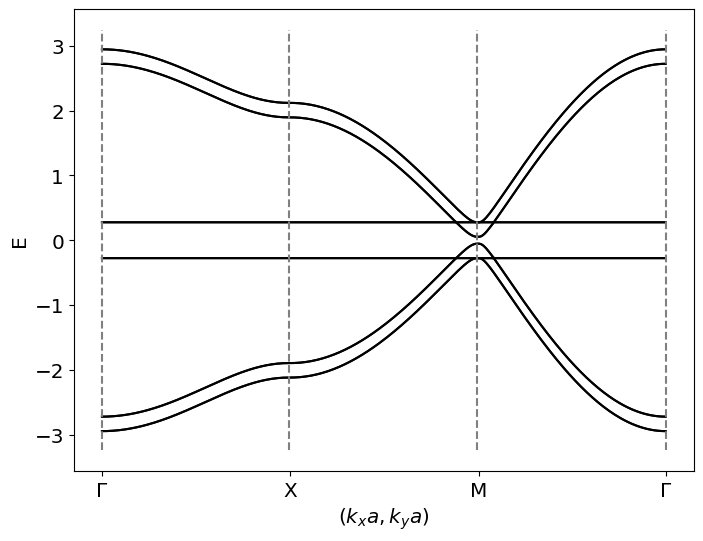

In [109]:
ham.plot_bands()

In [110]:
sdsfwlist = []
for it in range (60,100,10):
    sfws, sdsfw = ham.detSFW(it)
    sdsfwlist.append(sdsfw)
    print(sfws)


[[-4.45369376e-01-1.57643439e-18j -3.79200914e-17+2.36823526e-19j]
 [-3.60697197e-17+2.36823526e-19j -4.45369376e-01+6.57351079e-19j]]


KeyboardInterrupt: 

In [67]:
sdsfwlist

[(0.39711827559663554+2.4220413511566768e-18j),
 (0.3638422493748509-2.3613696123165877e-18j),
 (0.34872161136101437+1.0422249793258574e-18j),
 (0.33997162722756824+9.921755781194246e-19j),
 (0.33426235773986934-2.4785384360116367e-18j),
 (0.33024491450517185-4.791413846997925e-19j),
 (0.3272651774664694-5.449448650420194e-19j),
 (0.32496747538268994-2.6781712188633753e-20j)]

In [74]:
sfws

array([[6.45476684e-01+4.57388841e-19j, 5.35595873e-18-1.54128749e-19j],
       [6.88251539e-18-1.54128749e-19j, 6.45476684e-01+5.95792996e-19j]])

In [ ]:
np.sqrt(np.linalg.det(ten))